<a href="https://colab.research.google.com/github/shefi-S/Data-Mining/blob/main/tugas_data_mining_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
#pemanggilan data
data = pd.read_csv("produk_elektronik.csv")

In [6]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [7]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [8]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 6 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, maka akan dilakukan proses identifikasi lebih lanjut.

In [10]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [11]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga sebanyak 30,rating sebanyak 50, dan jumlah_ulasan sebanyak 20

In [12]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

In [13]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [14]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

In [15]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].median())

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan median dari keseluruhan data.

📌 Asumsi untuk kolom harga:

harga adalah data numerik (kontinu) yang menunjukkan berpakah harga dari produk. Jika terdapat beberapa harga yang bernilai minus dan ada yang memiliki nilai besar maka lebih baik untuk mengunakan median. Karena kita tidak mengecek distribusi data, kita bisa menggunakan pendekatan standar dalam analisis data:


In [16]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

In [17]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,  5.160e+02,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  4.480e+02,  7.360e+02,  2.280e+02,  1.830e+02,
        5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,  5.910e+02,
        5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,  4.290e+02,
        2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,  3.850e+02,
        2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,  6.070e+02,
        6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,  3.300e+02,
        4.900e+02, -1.200e+01,  1.200e+02,  6.190e+02,  4.660e

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan mean dari keseluruhan data.

📌 Asumsi untuk kolom rating:

harga adalah data numerik (kontinu) yang menunjukkan bbesar rating dari barang. Karena tnilai dari rating tergolong dalam sadikit rentang, maka dapatt menggunakan Mean dari data rating.

In [18]:
#melihat isi dalam kolom rating
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [19]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

In [136]:
#mengisi missing value
data['rating']=data['rating'].fillna(data['rating'].mean())

In [21]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

In [137]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2   , 3.5   , 3.8   , 3.2   , 3.7   , 4.    , 4.5   , 3.    ,
       3.9   , 3.6   , 4.7   , 4.4   , 4.0056, 3.1   , 4.9   , 4.6   ,
       5.    , 4.8   , 4.3   , 3.4   , 4.1   , 3.3   ])

Berdasarkan output tersebut, dapat dilihat bahwa kolom tersebut mengandung detail Missing Values : 'nan'. Pada kasus ini, masing-masing Missing Values tersebut akan diganti dengan median dari keseluruhan data.

📌 Asumsi untuk kolom jumlah ulasan:

jumlah ulasan adalah data numerik (kontinu) yang menunjukkan banyaknya ulasan pelanggan terhadap barang. Karena nilai dari jumlah ulasan memiliki rentang yang cukup panjang, maka dapatt menggunakan median dari data jumlah ulasan.

In [138]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [139]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

In [25]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [26]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273. , 239. , 209. ,  59. ,  76. , 309. , 390. ,  67. , 268. ,
       262.5, 335. , 139. , 224. , 181. , 267. , 111. , 218. , 300. ,
       363. , 480. , 295. , 125. , 159. , 451. ,  45. , 462. , 342. ,
       486. , 296. , 312. , 320. , 217. , 115. , 455. , 167. , 130. ,
        64. , 409. ,  21. , 154. , 405. , 145. , 477. ,  12. , 153. ,
        39. , 246. , 288. , 357. , 113. , 127. ,  14. , 257. , 373. ,
       330. , 158. ,  93. , 463. , 475. , 465. , 240. , 297. , 170. ,
       281. , 469. ,  47. , 235. , 151. , 301. , 490. , 160. , 123. ,
        75. , 370. , 350. , 484. , 258. , 466. , 458. , 340. , 332. ,
       189. , 199. , 416. , 163. , 205. , 271. , 428. , 415. , 436. ,
       152. , 351. , 110. , 253. , 499. , 248. ,  58. ,  51. , 175. ,
        91. , 438. , 225. , 471. , 143. , 345. ,  16. , 445. ,  23. ,
        82. , 408. , 414. , 172. , 356. , 215. , 285. , 265. , 275. ,
        34. , 459. , 290. , 262. , 319. , 298. , 173. , 104. , 119. ,
       247. , 396. ,

In [27]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


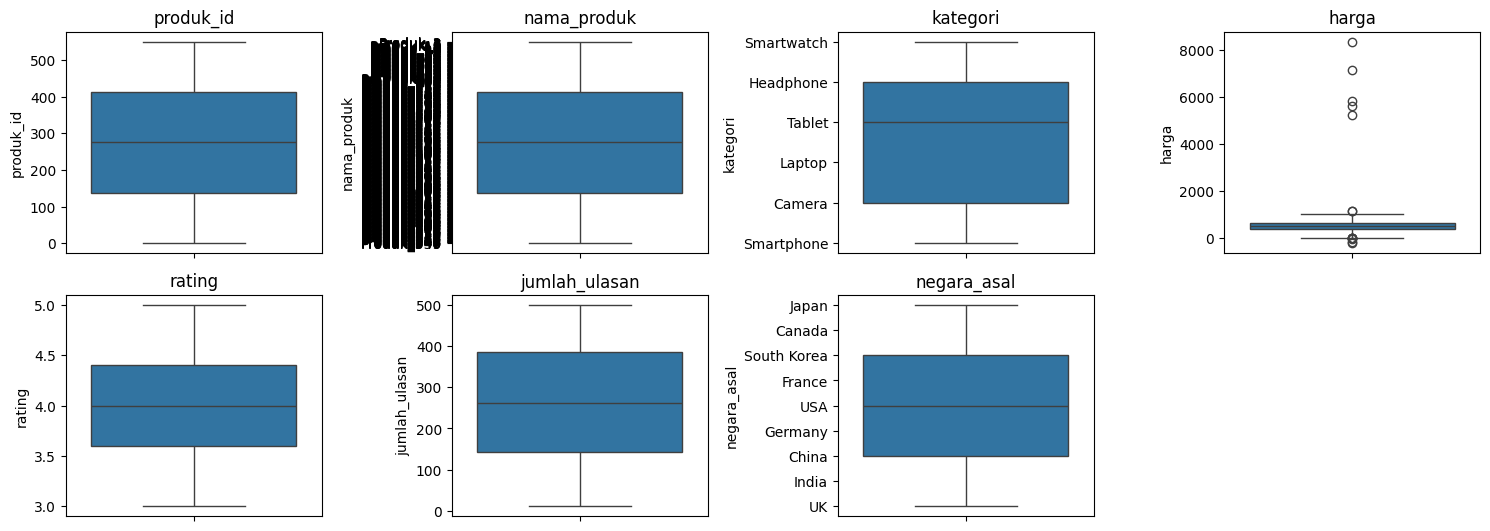

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['produk_id', 'nama_produk', 'kategori', 'harga',
            'rating', 'jumlah_ulasan','negara_asal']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [38]:
# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga', 'rating', 'jumlah_ulasan'] # Only include numerical columns

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

#Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Penanganan Outlier

Berdasarkan jumlah dan dampak outlier, ada beberapa metode yang bisa digunakan:

📌 A. Winsorizing (Mengganti Outlier dengan Batas IQR)

Alasan: karena data harga cukup penting dan tidak boleh dihapus, kita bisa mengganti outlier dengan batas kuartil.

In [39]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

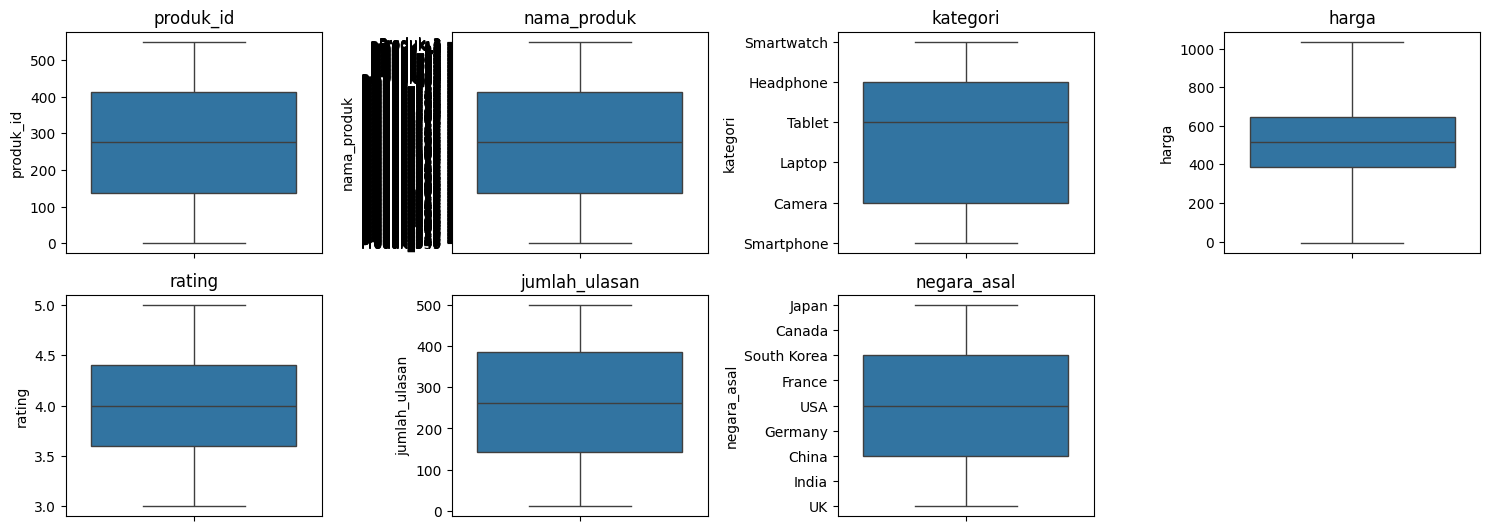

In [41]:
#cek boxplot lagi

num_cols = ['produk_id', 'nama_produk', 'kategori', 'harga',
            'rating', 'jumlah_ulasan','negara_asal']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [44]:
#melihat isi dalam kolom
data['produk_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [45]:
#melihat isi dalam kolom
data['nama_produk'].unique()

array(['Produk_1', 'Produk_2', 'Produk_3', 'Produk_4', 'Produk_5',
       'Produk_6', 'Produk_7', 'Produk_8', 'Produk_9', 'Produk_10',
       'Produk_11', 'Produk_12', 'Produk_13', 'Produk_14', 'Produk_15',
       'Produk_16', 'Produk_17', 'Produk_18', 'Produk_19', 'Produk_20',
       'Produk_21', 'Produk_22', 'Produk_23', 'Produk_24', 'Produk_25',
       'Produk_26', 'Produk_27', 'Produk_28', 'Produk_29', 'Produk_30',
       'Produk_31', 'Produk_32', 'Produk_33', 'Produk_34', 'Produk_35',
       'Produk_36', 'Produk_37', 'Produk_38', 'Produk_39', 'Produk_40',
       'Produk_41', 'Produk_42', 'Produk_43', 'Produk_44', 'Produk_45',
       'Produk_46', 'Produk_47', 'Produk_48', 'Produk_49', 'Produk_50',
       'Produk_51', 'Produk_52', 'Produk_53', 'Produk_54', 'Produk_55',
       'Produk_56', 'Produk_57', 'Produk_58', 'Produk_59', 'Produk_60',
       'Produk_61', 'Produk_62', 'Produk_63', 'Produk_64', 'Produk_65',
       'Produk_66', 'Produk_67', 'Produk_68', 'Produk_69', 'Produk_70',
 

In [46]:
#melihat isi dalam kolom
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

ENCODING DATA KATEGORIK
Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning. Model Machine Learning umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan. Dalam hal ini, data yang perlu diubah dalah data kategori dan data negara asal karena berupa data ordinal yang dapat diubah menjadi numerik

In [81]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Contoh data
data = pd.DataFrame({
    'kategori': ['Smartwatch', 'Laptop', 'Camera', 'Smartphone', 'Tablet', 'Headphone']
})

# Menentukan urutan kategori yang benar
order = ['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera', 'Smartphone']

# Konversi ke tipe kategori dengan urutan yang ditentukan
data['kategori'] = pd.Categorical(data['kategori'], categories=order, ordered=True)

# Ordinal Encoding
oe = OrdinalEncoder(categories=[order])
data['kategori_encoded'] = oe.fit_transform(data[['kategori']])

# Cek hasil mapping kategori ke angka
print(dict(zip(order, oe.transform([[cat] for cat in order]).flatten())))

# Menampilkan data yang telah di-encode
print(data)

{'Smartwatch': 0.0, 'Headphone': 1.0, 'Tablet': 2.0, 'Laptop': 3.0, 'Camera': 4.0, 'Smartphone': 5.0}
     kategori  kategori_encoded
0  Smartwatch               0.0
1      Laptop               3.0
2      Camera               4.0
3  Smartphone               5.0
4      Tablet               2.0
5   Headphone               1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


Ordinal Encoding : Mengubah kategori menjadi angka berurutan (0,1,2,..). Digunakan jika kategori memiliki urutan yang jelas karena data memiliki lumayan banyak kategori tetapi juga tidak yang berhubungan sekali dengan statistik dehingga dapat menggunakan ordinal encoding.

In [132]:
#melihat isi dalam kolom
data['negara_asal'].unique() # Change 'Negara_Asal' to 'negara_asal'

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

In [133]:
# Buat dictionary untuk mapping negara ke region
country_to_region = {
    'USA': 'North America', 'Canada': 'North America', 'Mexico': 'North America', 'Bahamas': 'North America',
    'UK': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'China': 'Asia', 'Japan': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia', 'South Korea': 'Asia',
    'Brazil': 'South America', 'Argentina': 'South America', 'Colombia': 'South America',
    'South Africa': 'Africa', 'Nigeria': 'Africa', 'Egypt': 'Africa',
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
}

# Ubah negara menjadi region
data['country_region'] = data['negara_asal'].map(country_to_region).fillna('Others')

# One-Hot Encoding pada region
data = pd.get_dummies(data, columns=['country_region'], prefix='region')

Curse of Dimensionality: Jika dataset memiliki fitur terlalu banyak, model bisa menjadi lambat dan overfitting.
Sparse Matrix: Banyaknya kolom dengan nilai 0 menyebabkan penggunaan memori yang besar. Alih-alih menyimpan setiap negara sebagai fitur terpisah, kita bisa mengelompokkan negara berdasarkan wilayah geografis

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   produk_id             550 non-null    int64  
 1   nama_produk           550 non-null    object 
 2   kategori              550 non-null    object 
 3   harga                 520 non-null    float64
 4   rating                500 non-null    float64
 5   jumlah_ulasan         530 non-null    float64
 6   negara_asal           550 non-null    object 
 7   region_Asia           550 non-null    bool   
 8   region_Europe         550 non-null    bool   
 9   region_North America  550 non-null    bool   
dtypes: bool(3), float64(3), int64(1), object(3)
memory usage: 31.8+ KB
